In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 8)

In [ ]:
# Instalando o pacote alpha_vantage
!pip install -q alpha_vantage

In [ ]:
# Importando a classe Timeseries de alpha_vantage.timeseries
from alpha_vantage.timeseries import TimeSeries

In [1]:
ALPHAVANTAGE_API_KEY = "02FTOCDGZQHVC0DR"


In [ ]:
# Criando o objeto ts do tipo Timeseries
ts = TimeSeries(key=ALPHAVANTAGE_API_KEY, output_format='pandas')

In [ ]:
# Pesquisando o código dos ativos com get_symbol_search()
ts.get_symbol_search('ITUB4.SAO')

(            1. symbol                    2. name  ... 8. currency 9. matchScore
 date                                              ...                          
 1970-01-01  ITUB4.SAO  Itaú Unibanco Holding S.A  ...         BRL        1.0000
 
 [1 rows x 9 columns], None)

In [ ]:
# Obtendo os dados semanais do IBOV usando get_weekly()
d = ts.get_weekly(symbol='IBOV.SAO')

In [ ]:
d[0]

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-05-10,122038.11,122772.37,10000.00,121909.03,8.219074e+09
2021-05-07,118951.28,122038.11,117630.62,122038.11,4.435934e+10
2021-04-30,120533.72,121497.86,118893.84,118893.84,4.413244e+10
2021-04-23,121116.05,121974.21,119203.20,120530.06,3.405363e+10
2021-04-16,117660.77,121408.72,117660.77,121113.93,4.194840e+10
...,...,...,...,...,...
2005-02-11,25732.97,26786.45,25732.97,26670.52,3.374441e+08
2005-02-04,23969.96,25735.65,23969.96,25731.94,7.449898e+10
2005-01-28,23818.94,24555.49,23594.57,23968.09,4.187542e+08


In [ ]:
# Obtendo os dados e metadados diários do IBOV usando get_daily() com outputsize='full'
dados, meta_dados = ts.get_daily(symbol='IBOV.SAO', outputsize='full')


In [ ]:
# Exibindo os dados
dados

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-05-10,122038.11,122772.37,121794.50,121909.03,8.219074e+09
2021-05-07,119921.69,122038.11,119921.69,122038.11,8.865100e+09
2021-05-06,119576.79,119966.42,119071.04,119920.61,8.779561e+09
2021-05-05,117724.64,119733.86,117724.64,119564.44,9.060872e+09
2021-05-04,119209.48,119293.42,117630.62,117712.00,8.765477e+09
...,...,...,...,...,...
2005-01-07,24375.64,24874.35,24375.64,24747.22,1.049562e+08
2005-01-06,24695.19,24807.97,24250.38,24366.93,1.511681e+08
2005-01-05,24859.33,25000.61,24522.68,24691.80,1.274228e+08


In [ ]:
# Exibindo os meta-dados
meta_dados

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'IBOV.SAO',
 '3. Last Refreshed': '2021-05-10',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

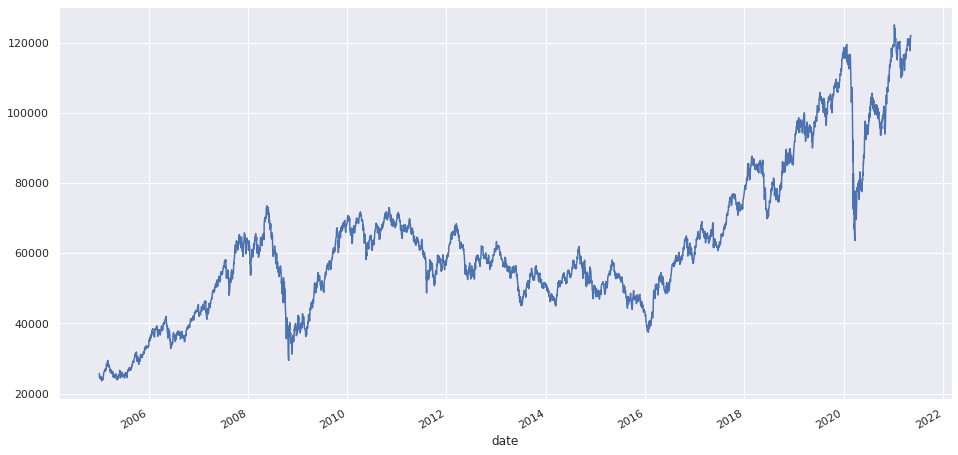

In [ ]:
# Plotando o gráfico do preço de fechamento
dados['4. close'].plot()

# Indicadores Técnicos

In [ ]:
# Importando TechIndicators de alpha_vantage.techindicators
from alpha_vantage.techindicators import TechIndicators


In [ ]:
# Criando o objeto ti do TechIndicators
ti = TechIndicators(key=ALPHAVANTAGE_API_KEY, output_format='pandas')

In [ ]:
# Obtendo os dados diários do Índice Bovespa  
ibov, meta_ibov = ts.get_daily(symbol='IBOV.SAO', outputsize='full')


In [ ]:
# Obtendo as média móveis de 20 e 200 dias com get_sma() e o IFR de 14 dias com get_rsi()
mm20  = ti.get_sma('IBOV.SAO', interval='daily' )[0]
mm200 = ti.get_sma('IBOV.SAO', interval='daily', time_period=200)[0]
rsi   = ti.get_rsi('IBOV.SAO', time_period=14)[0]




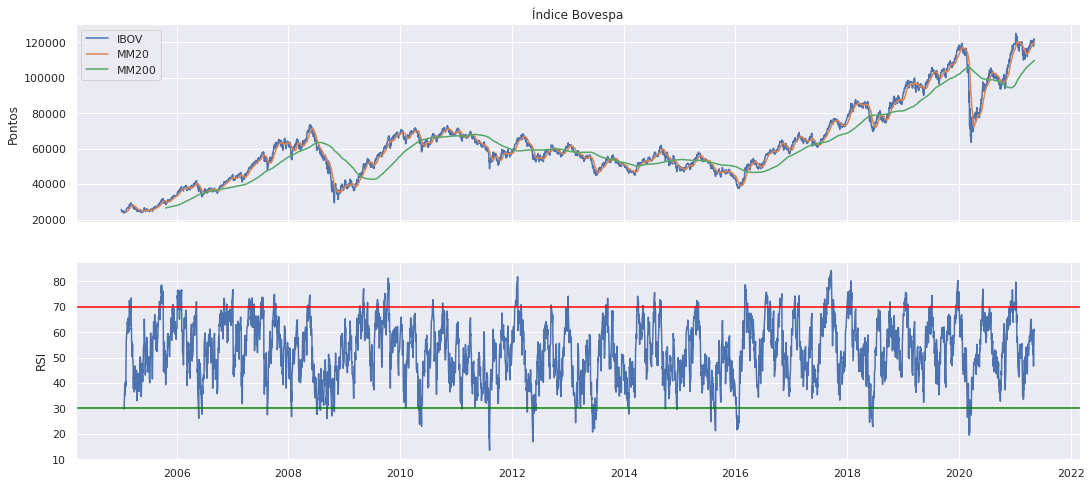

In [ ]:
# Plotando um gráfico com os indicadores Técnicos Baixados
fig, ax = plt.subplots(2,1, sharex=True, figsize=(18,8))

ax[0].set(ylabel="Pontos", title='Índice Bovespa')
ax[0].plot(ibov['4. close'], label="IBOV")
ax[0].plot(mm20, label='MM20')
ax[0].plot(mm200, label='MM200')

ax[1].set(ylabel="RSI")
ax[1].plot(rsi)
ax[1].axhline(70, color='red')
ax[1].axhline(30, color='green')

ax[0].legend();


# Dados Fundamentalistas

In [ ]:
# Importando FundamentalData de alpha_vantage.FundamentalData
from alpha_vantage.fundamentaldata import FundamentalData       

In [ ]:
# Criando um objeto do tipo FundamentalData
fd = FundamentalData(key=ALPHAVANTAGE_API_KEY, output_format='pandas')

In [ ]:
#Definindo o código da empresa
ticker = 'MSFT'

In [ ]:
# Obtendo dados gerais da companhia com get_company_overview()
fd.get_company_overview(ticker)

In [ ]:
bs = fd.get_balance_sheet_quarterly(ticker)

In [ ]:
bs [0]

,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,accumulatedDepreciationAmortizationPPE,intangibleAssets,intangibleAssetsExcludingGoodwill,goodwill,investments,longTermInvestments,shortTermInvestments,otherCurrentAssets,otherNonCurrrentAssets,totalLiabilities,totalCurrentLiabilities,currentAccountsPayable,deferredRevenue,currentDebt,shortTermDebt,totalNonCurrentLiabilities,capitalLeaseObligations,longTermDebt,currentLongTermDebt,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,2021-03-31,USD,308879000000,165614000000,13702000000,125407000000,2245000000,27129000000,146065000000,54945000000,49681000000,57825000000,8127000000,49698000000,118220000000,5395000000,111705000000,11640000000,14427000000,174374000000,72193000000,13412000000,65428000000,8051000000,8051000000,102181000000,9272000000,58058000000,8051000000,50007000000,58058000000,10450000000,12941000000,134505000000,None,50735000000,82308000000,7534000000
1970-01-01 00:00:00.000000001,2020-12-31,USD,304137000000,173973000000,14432000000,131968000000,1924000000,28020000000,133064000000,51737000000,47715000000,50774000000,6555000000,44219000000,125914000000,3794000000,117536000000,12769000000,13561000000,173901000000,67486000000,12770000000,66774000000,5387000000,5387000000,106415000000,8875000000,60523000000,5387000000,55136000000,60523000000,10527000000,12544000000,130236000000,None,44973000000,81896000000,7546000000
1970-01-01 00:00:00.000000002,2020-09-30,USD,301001000000,177077000000,17205000000,137977000000,2705000000,23951000000,126624000000,47927000000,45417000000,50813000000,6923000000,43890000000,131702000000,3103000000,120772000000,13544000000,13034000000,177609000000,70056000000,12509000000,72610000000,6497000000,6497000000,107553000000,7753000000,63552000000,6497000000,57055000000,63552000000,9476000000,11525000000,123392000000,None,39193000000,81089000000,7564000000
1970-01-01 00:00:00.000000003,2020-06-30,USD,301311000000,181915000000,13576000000,136527000000,1895000000,32453000000,122096000000,44151000000,43197000000,50389000000,7038000000,43351000000,246000000,2965000000,122951000000,11482000000,13138000000,183007000000,72310000000,12530000000,78360000000,3749000000,3749000000,110697000000,7671000000,63327000000,3749000000,59578000000,63327000000,10027000000,10632000000,118304000000,None,34566000000,80552000000,7571000000
1970-01-01 00:00:00.000000004,2020-03-31,USD,285449000000,170505000000,11710000000,137626000000,1644000000,22699000000,117444000000,41221000000,41512000000,48919000000,6855000000,42064000000,132104000000,2660000000,125916000000,8536000000,13696000000,170948000000,58707000000,9246000000,60794000000,3748000000,3748000000,112241000000,7248000000,66610000000,3748000000,62862000000,66610000000,9151000000,9673000000,114501000000,None,32012000000,79813000000,7590000000
1970-01-01 00:00:00.000000005,2019-12-31,USD,282794000000,167074000000,8864000000,134253000000,1823000000,23525000000,118120000000,40522000000,39597000000,49374000000,7126000000,42248000000,129483000000,2755000000,125389000000,7473000000,14630000000,172685000000,59640000000,8811000000,62442000000,6247000000,6247000000,113045000000,7172000000,69608000000,6247000000,63361000000,69608000000,9131000000,9658000000,110109000000,None,30739000000,79625000000,7611000000
1970-01-01 00:00:00.000000006,2019-09-30,USD,278955000000,165896000000,13117000000,136636000000,2622000000,19087000000,115359000000,38409000000,36971000000,49621000000,7508000000,42113000000,131971000000,2684000000,123519000000,7551000000,14455000000,172894000000,58118000000,8574000000,68052000000,3017000000,3017000000,114776000000,6659000000,69495000000,30